In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', 500)

from scikitplot.estimators import plot_learning_curve
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold



from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
train = pd.read_csv('titanic.train.csv')
train.shape

(891, 12)

# Basics info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.500,NaN,S
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.775,NaN,S
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.500,E101,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.500,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.500,E40,C


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualisation

0    0.616162
1    0.383838
Name: Survived, dtype: float64


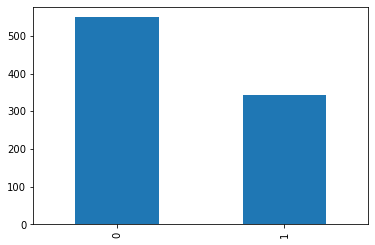

In [8]:
print(train['Survived'].value_counts(normalize=True))
train['Survived'].value_counts().plot(kind='bar');

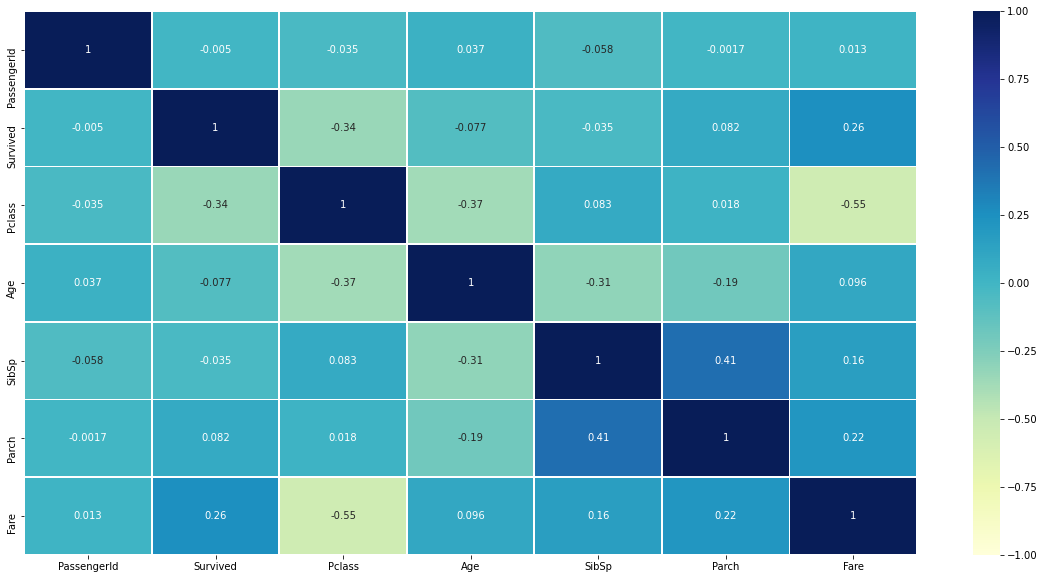

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

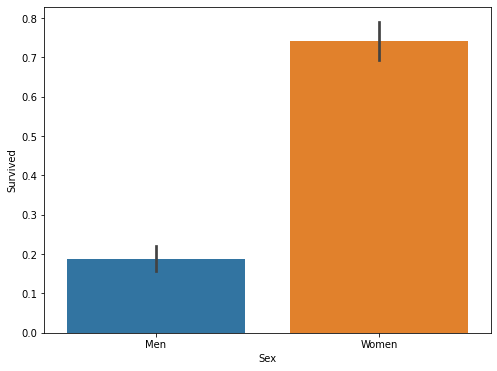

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'Sex', y='Survived', data = train).set_xticklabels(["Men", "Women"]);

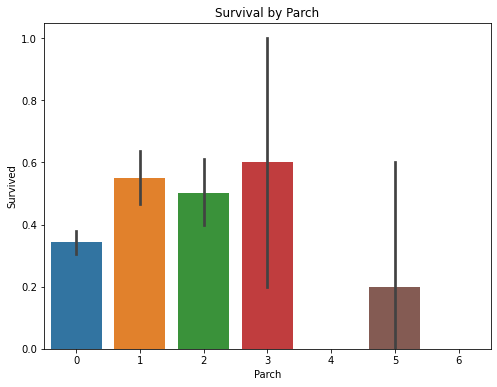

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'Parch', y='Survived', data = train).set_title("Survival by Parch",fontsize=12);

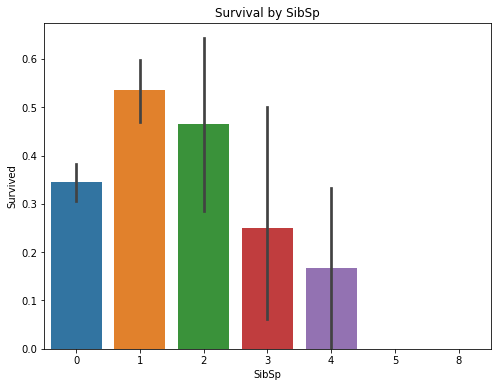

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'SibSp', y='Survived', data = train).set_title("Survival by SibSp",fontsize=12);

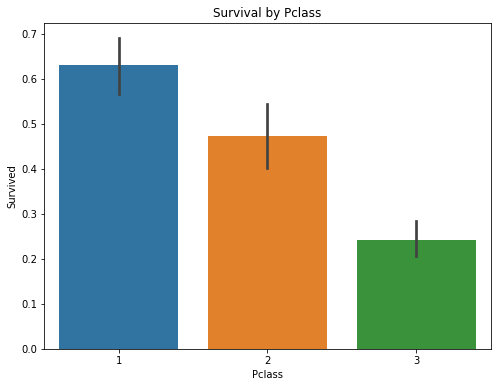

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x= 'Pclass', y='Survived', data = train).set_title("Survival by Pclass",fontsize=12);

In [18]:
def plor_barplot(col ):
    g = sns.factorplot(x= 'Sex', y='Survived',col=col, data = train, kind='bar', aspect=0.8);
    (g.set_axis_labels('','Survival Rate').
     set_xticklabels(["Men", "Women"]).fig.suptitle('How many Men and Women Survived by Passenger{}'.format(col)));
    plt.subplots_adjust(top=0.9);

C:\Users\48500\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


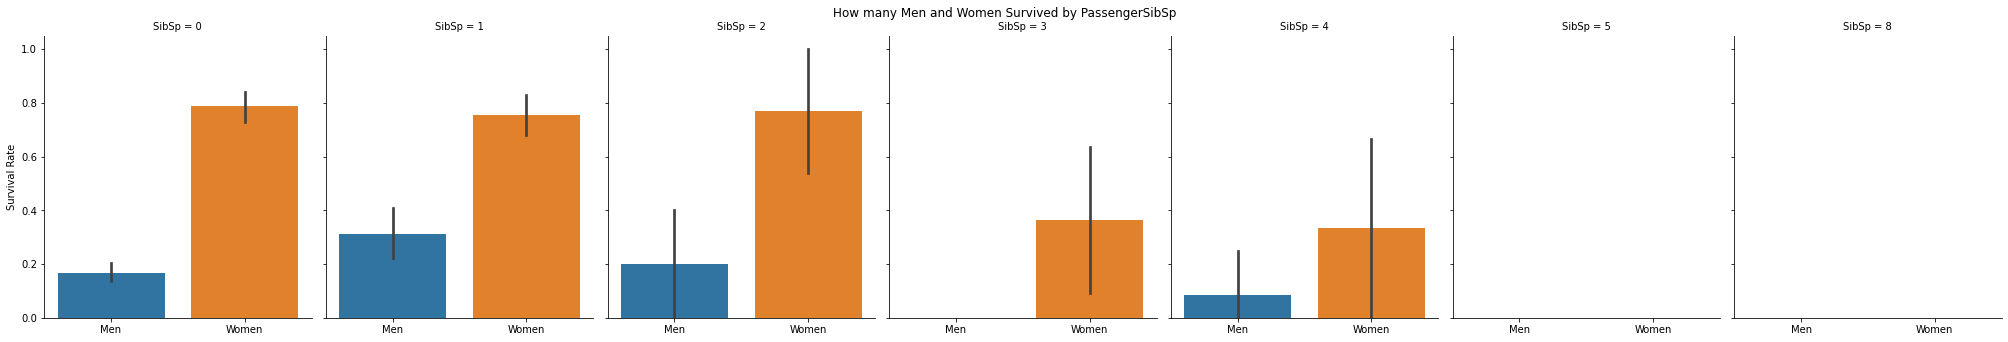

In [19]:
plor_barplot(col= 'SibSp')

C:\Users\48500\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


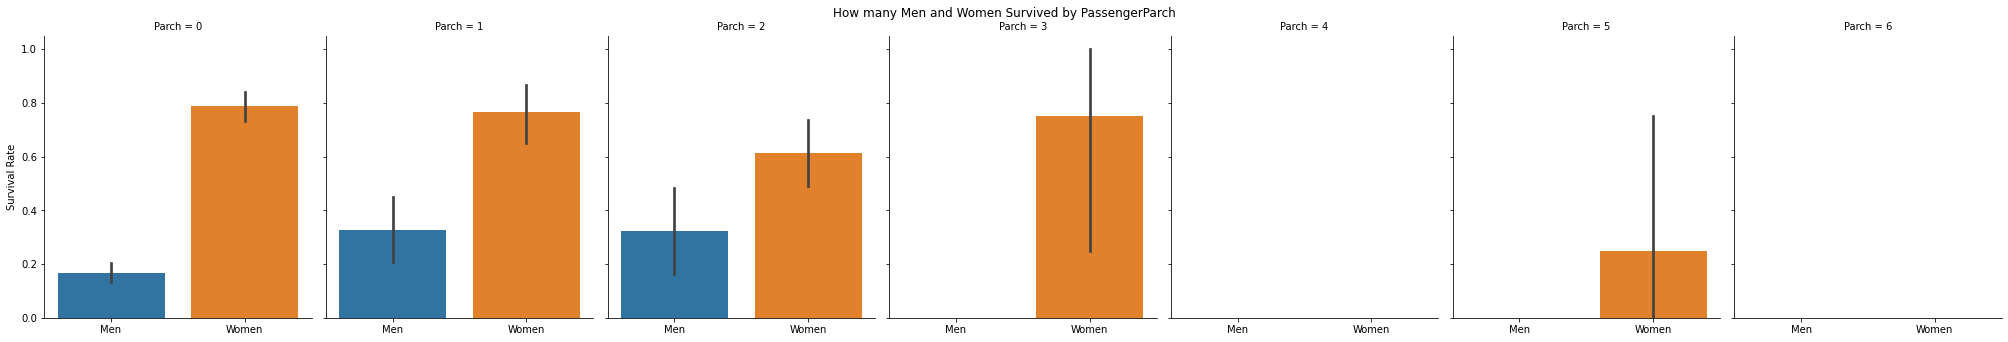

In [15]:
plor_barplot(col= 'Parch')

C:\Users\48500\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


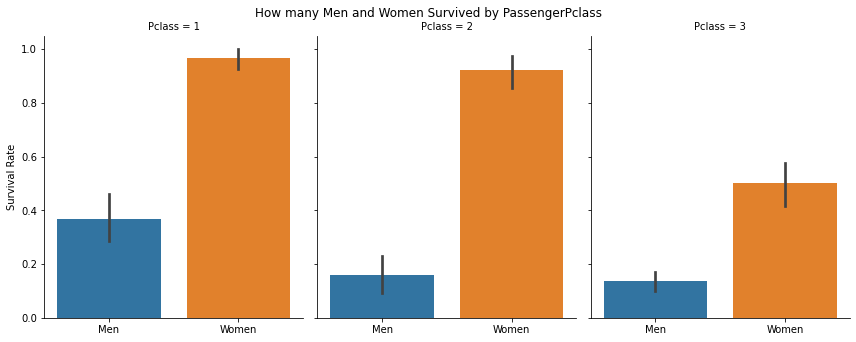

In [16]:
plor_barplot(col= 'Pclass')

C:\Users\48500\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


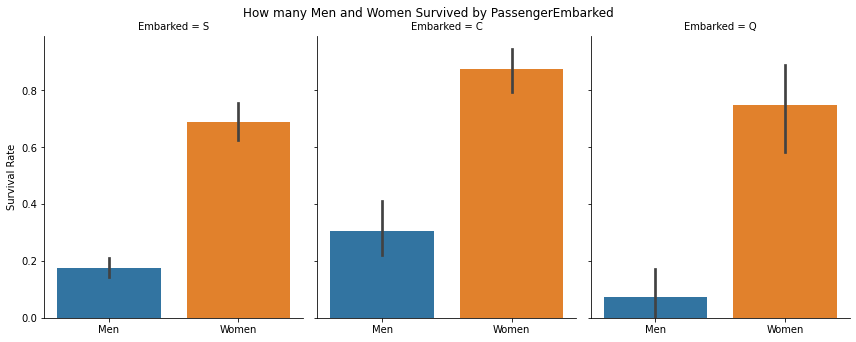

In [17]:
plor_barplot('Embarked')

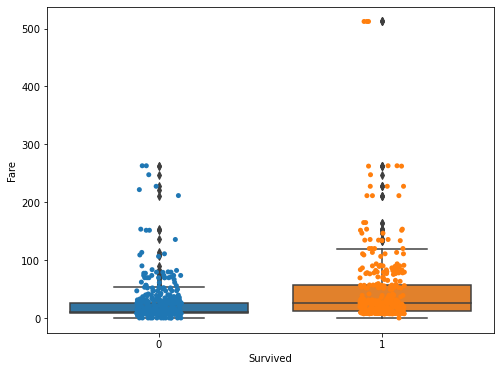

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=train)
sns.stripplot(x='Survived', y='Fare', data=train,jitter=True)

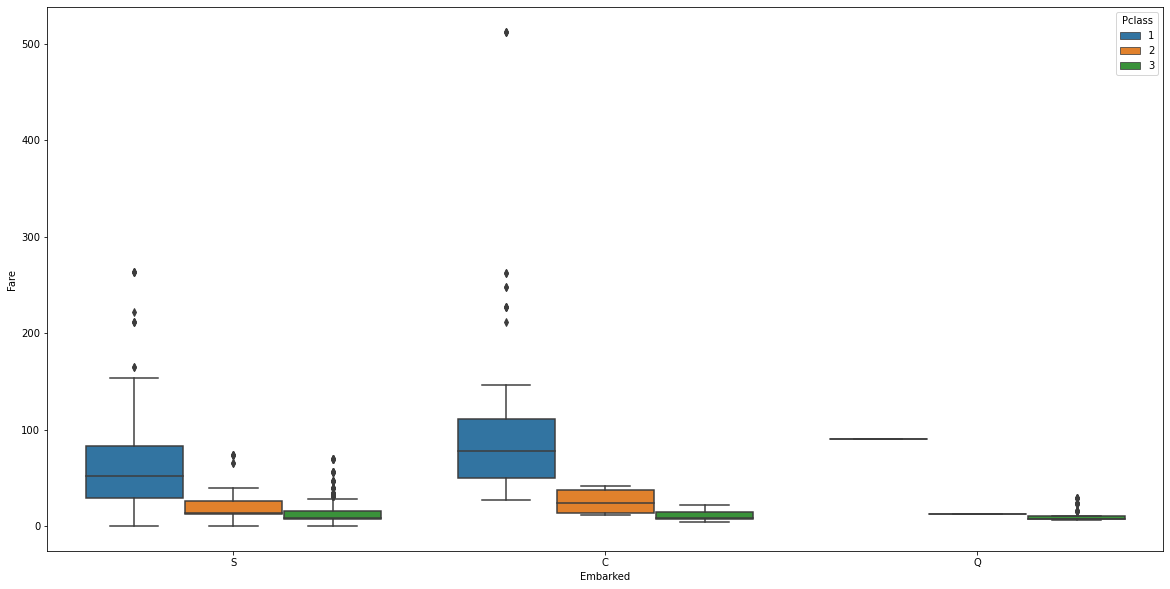

In [19]:
sns.boxplot(x ='Embarked', y='Fare', hue= 'Pclass',data=train)

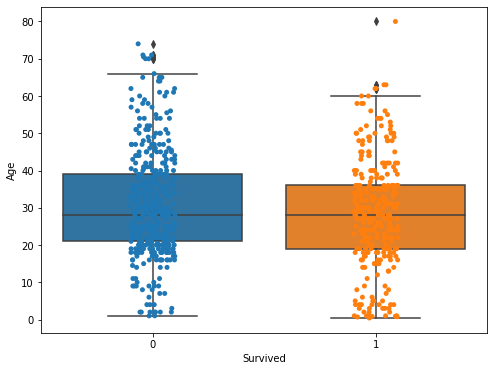

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=train)
sns.stripplot(x='Survived', y='Age', data=train,jitter=True)

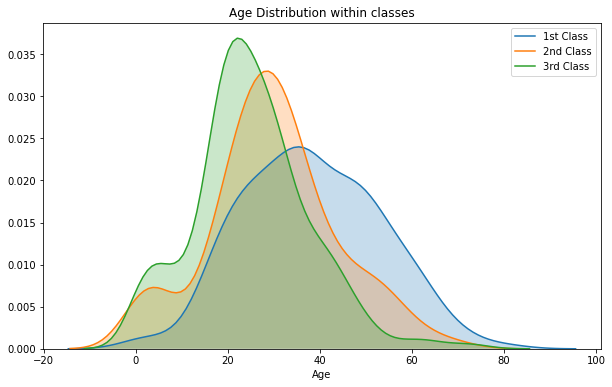

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(train.Age[train.Pclass==1], shade=True)
sns.kdeplot(train.Age[train.Pclass==2], shade=True)
sns.kdeplot(train.Age[train.Pclass==3], shade=True)
plt.xlabel("Age")  
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

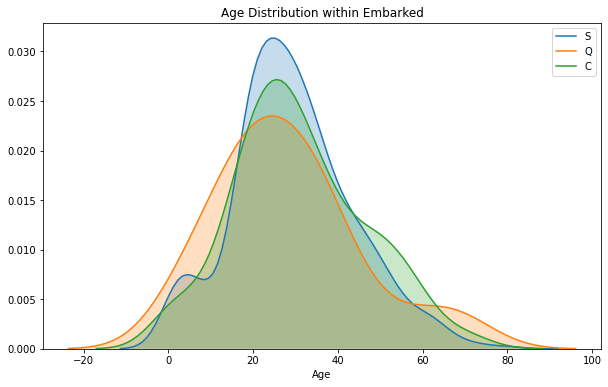

In [22]:
plt.figure(figsize=(10,6))
sns.kdeplot(train.Age[train.Embarked=="S"], shade=True)
sns.kdeplot(train.Age[train.Embarked=="Q"], shade=True)
sns.kdeplot(train.Age[train.Embarked=="C"], shade=True)
plt.xlabel("Age")  
plt.title("Age Distribution within Embarked")
plt.legend(('S', 'Q','C'),loc='best') ;

# Benchmarkmodel 

In [23]:
def get_XY(feats):
    X = train[feats].fillna(-1).values
    y = train['Survived'].values
    
    return X, y

In [24]:
X, y = get_XY(['Pclass','Age', 'SibSp', 'Parch','Fare'])

In [25]:
cross_val_score(DummyClassifier(random_state=2020), X, y, cv = 3,scoring='accuracy').mean()

0.5207631874298542

# Decision tree - finding the best depth

In [27]:
cv = StratifiedKFold(n_splits=3, random_state=2020)

def best_depth(model):
    results = []
    for depth in range(1,15):
        result = cross_val_score(model(random_state=2020, max_depth=depth), X, y, cv = cv,scoring='accuracy').mean()
        results.append(result)

    plt.figure(figsize=(8,4))
    plt.plot(range(1,15),results)
    plt.xlabel("Depth")  
    plt.ylabel("Accuracy")  
    plt.plot(np.argmax(results) + 1,max(results), 'o', color = 'red', markersize = 8);

    plt.title('Model: {} \n Max depth: {} \n Accuracy: {}'.format(model.__name__, np.argmax(results) + 1, round(max(results),3)))

    plot_learning_curve(model(random_state=2020, max_depth= np.argmax(results) + 1),X, y, cv=3,scoring='accuracy',figsize=(8,4));

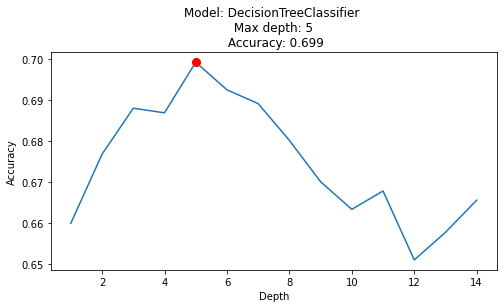

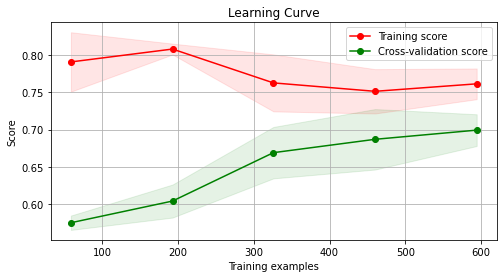

In [28]:
best_depth(DecisionTreeClassifier)

# For vomparison LogisticRegression

0.6936026936026937


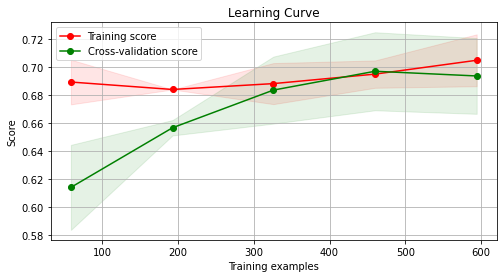

In [29]:
print(cross_val_score(LogisticRegression(random_state=2020), X, y, cv = 3,scoring='accuracy').mean())
plot_learning_curve(LogisticRegression(random_state=2020),X, y, cv=3,scoring='accuracy', figsize=(8,4));

# Feature Engineering

In [30]:
train['Name'].sample(5)

868         van Melkebeke, Mr. Philemon
760                  Garfirth, Mr. John
714               Greenberg, Mr. Samuel
422                  Zimmerman, Mr. Leo
752    Vande Velde, Mr. Johannes Joseph
Name: Name, dtype: object

In [31]:
train['title'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
the Countess      1
Don               1
Capt              1
Sir               1
Ms                1
Jonkheer          1
Mme               1
Lady              1
Name: title, dtype: int64

In [32]:
top_5_title = train['title'].value_counts().head(5).keys()

In [33]:
title_norm = defaultdict(lambda: 'other', dict(zip(top_5_title,top_5_title)))
train['title_norm'] = train['title'].map(title_norm)
train['title_norm'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      20
Dr          7
Name: title_norm, dtype: int64

In [34]:
train['title_norm_cat'] = train['title_norm'].factorize()[0]

In [35]:
X, y = get_XY(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'title_norm_cat'])

# Accuracy 0.699 vs 0.817 (plus : title_norm_cat)

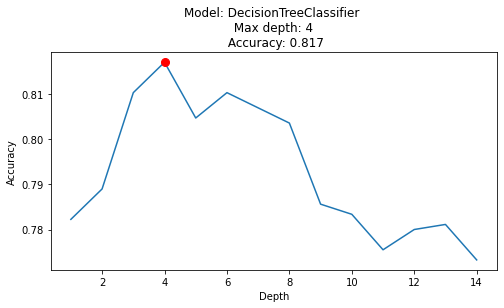

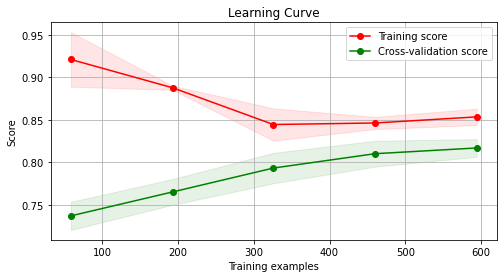

In [36]:
best_depth(DecisionTreeClassifier)

# LogisticRegression

0.7497194163860831


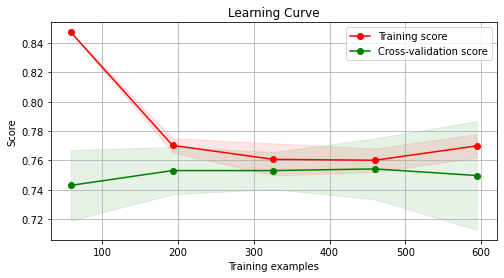

In [37]:
print(cross_val_score(LogisticRegression(random_state=2020), X, y, cv = 3,scoring='accuracy').mean())
plot_learning_curve(LogisticRegression(random_state=2020),X, y, cv=3,scoring='accuracy', figsize=(8,4));

# Age

In [38]:
mean_age_title = train.groupby('title_norm')['Age'].mean().to_dict()
median_age_title = train.groupby('title_norm')['Age'].median().to_dict()

print(mean_age_title)
print(median_age_title)

{'Dr': 42.0, 'Master': 4.574166666666667, 'Miss': 21.773972602739725, 'Mr': 32.368090452261306, 'Mrs': 35.898148148148145, 'other': 42.5}
{'Dr': 46.5, 'Master': 3.5, 'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'other': 43.5}


In [39]:
train['age_mean'] = train['title_norm'].map(mean_age_title)
train['age_median'] = train['title_norm'].map(median_age_title)

X, y = get_XY(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'title_norm_cat','age_mean','age_median'])

# No improvement 0.817 vs 0.817 (plus: 'age_mean','age_median')

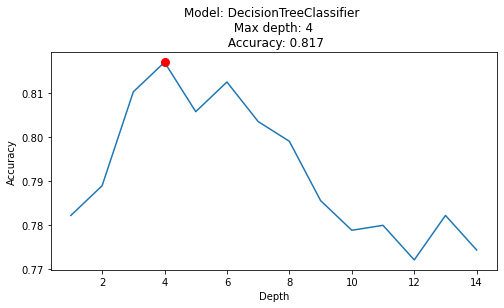

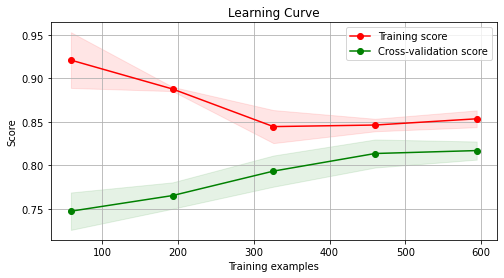

In [40]:
best_depth(DecisionTreeClassifier)

# LogisticRegression  0.74 vs 0.77 (plus: 'age_mean','age_median')

C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.7789001122334457


C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

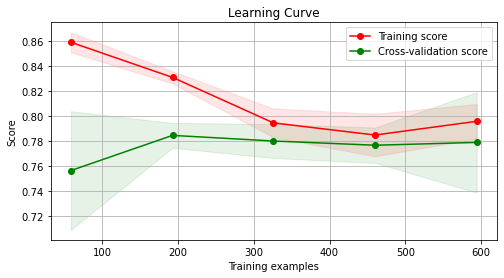

In [41]:
print(cross_val_score(LogisticRegression(random_state=2020), X, y, cv = cv,scoring='accuracy').mean());
plot_learning_curve(LogisticRegression(random_state=2020),X, y, cv=cv,scoring='accuracy', figsize=(8,4));

# Family


In [42]:
train['adult'] = train['Age'] > 18
train['child'] = train['Age'] < 18


train['family_size'] = train['SibSp'] + train['Parch'] + 1
train['family_singel'] = train['family_size'] == 1
train['family_small']  = (train['family_size'] > 1) & (train['family_size'] < 5)
train['family_big']  = train['family_size'] > 4



def is_mother(row):
    if row['Sex'] == 'male': return False
    if row['title_norm_cat'] == 'miss': return False
    return True



train['is_mother'] = train.apply(is_mother, axis= 1)
train['is_mother'].value_counts()
    

False    577
True     314
Name: is_mother, dtype: int64

In [43]:
X, y = get_XY(['Pclass', 'title_norm_cat', 'SibSp', 'Parch', 'Fare', 'age_mean', 'age_median', 'family_size', 'family_singel', 'family_small', 'family_big'])

# Small improvement 0.817 vs 0.822 (plus: new feats)

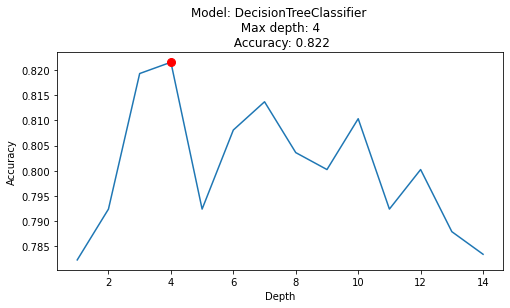

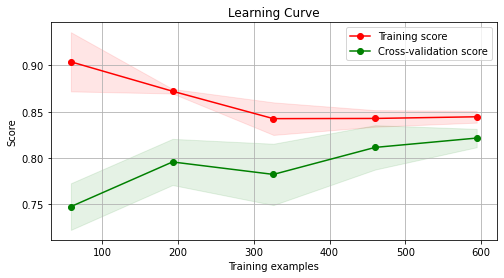

In [44]:
best_depth(DecisionTreeClassifier)

# LogisticRegression  0.74 vs 0.77 (plus: new feats )

C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.7744107744107745


C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\48500\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

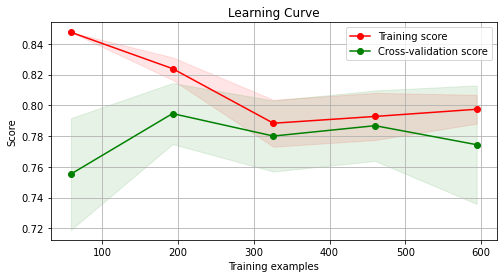

In [56]:
print(cross_val_score(LogisticRegression(random_state=2020), X, y, cv = 3,scoring='accuracy').mean())
plot_learning_curve(LogisticRegression(random_state=2020),X, y, cv=cv,scoring='accuracy', figsize=(8,4));

In [47]:
train['Cabin_new'] = train['Cabin'].str[0]
train['Cabin_new'] = pd.factorize(train['Cabin_new'])[0]
X, y = get_XY(['Pclass', 'title_norm_cat', 'SibSp', 'Parch', 'Fare', 'age_mean', 'age_median', 'family_size', 'family_singel', 'family_small', 'family_big','Cabin_new'])


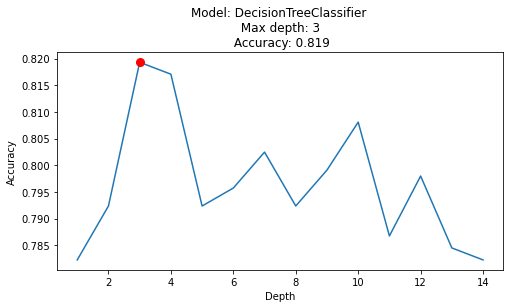

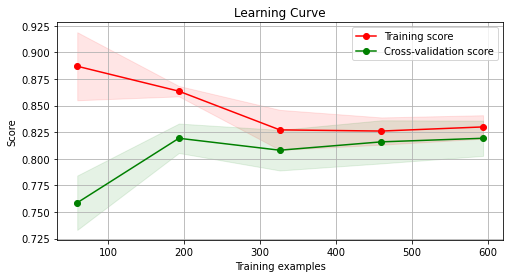

In [48]:
best_depth(DecisionTreeClassifier)


# Let's check more sophisticated models

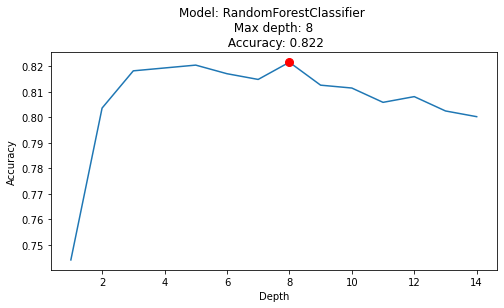

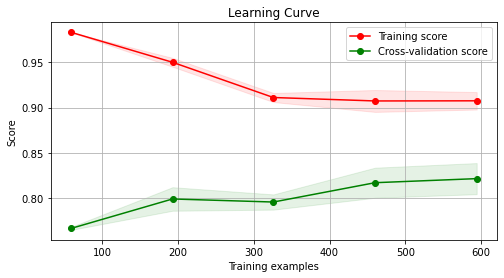

In [58]:
best_depth(RandomForestClassifier)

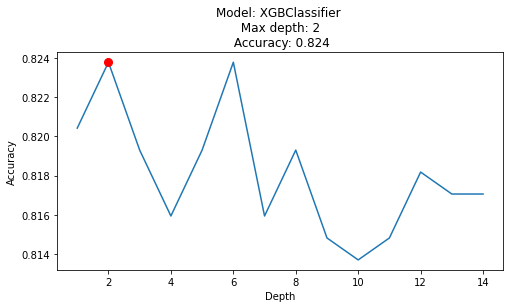

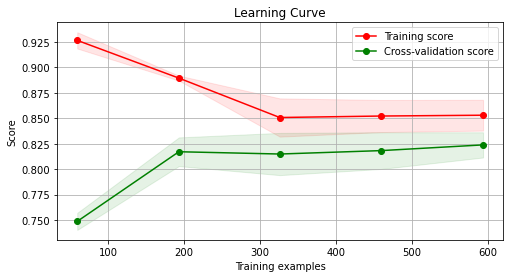

In [59]:
best_depth(xgb.XGBClassifier)